In [81]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [82]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [83]:
#데이터 불러오기
from google.colab import files
uploaded = files.upload()
import io 
train = pd.read_csv(io.BytesIO(uploaded['movies_train.csv']))

Saving movies_train.csv to movies_train (4).csv


##데이터 설명
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

##1)일부 데이터 미리보기

In [84]:
#train 데이터 확인 
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [85]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,nan,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,nan,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,nan,0,363,5,7166532


##2)데이터 요약

In [86]:
train.shape

(600, 12)

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


##3) 데이터의 요약통계량 확인

In [88]:
#float_format에서는 실수를 출력하는 함수를 설정할 수 있습니다. 
#아래 람다 함수 lambda x: f'{x:.2f}'는 실수 x를 받아 소수점 둘째자리까지만 표현합니다.
#설정을 취소할 때는 아래와 같이 합니다.
#pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.1f}'.format

In [89]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


##4)결측치 확인 및 데이터 전처리

In [90]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

train데이터 내에 dir_prev_bfum 열에 결측치가 330개 존재한다.

In [91]:
#결측값들의 특성 확인
train[train['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,nan,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,nan,0,0,4,745


In [92]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].isna().sum()

0

train 데이터에서 dir_prev_bfnum 이 결측값으로 존재하는 데이터들은 전부 dir_prev_num 도 0인 영화들이다.<br> 
즉, 감독의 이전작품이 존재하지 않은 경우이다.<br>따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [93]:
#dir_prev_bfnum에 있는 결측값은 전부 0으로 채운기
train['dir_prev_bfnum'].fillna(0,inplace=True)

In [94]:
#잘 채워졌는지 확인
train['dir_prev_bfnum'].isna().sum()

0

In [95]:
train['release_time'].head()

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object

In [96]:
#release_time 을 datetime object 로 변환
train['release_time']=pd.to_datetime(train['release_time'])

In [97]:
#잘 변환되었는지 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


#데이터 시각화 및 분석

##1) 장르별 평균관객수

In [98]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


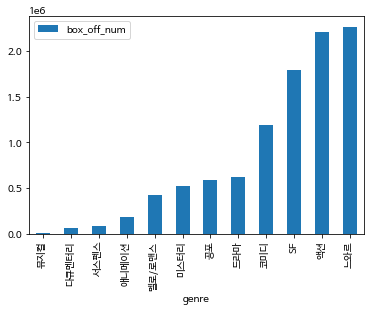

In [99]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num').plot(kind='bar')


느와르,액션,SF,코미디 순으로 평균 관객수가 많다. 가장 평균 관객수가 적은 영화는 뮤지컬이다.

##2) 영화 개봉 월에 따른 평균 관객수

In [100]:
#개봉일에서 월만 추출해 release_month 열에 저장
train['release_month']= train['release_time'].dt.month

In [101]:
#잘 되었는지 확인
train[['release_time','release_month']]

,release_time,release_month
0,2012-11-22,11
1,2015-11-19,11
2,2013-06-05,6
3,2012-07-12,7
4,2010-11-04,11
...,...,...
595,2014-08-13,8
596,2013-03-14,3
597,2010-09-30,9
598,2015-05-14,5


In [102]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num',ascending=False)

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


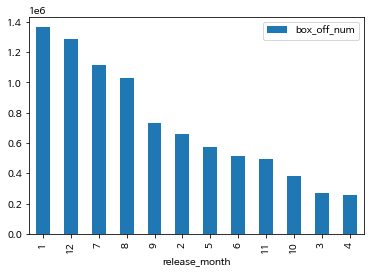

In [103]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num',ascending=False).plot(kind='bar')

월별 평균 관객수 따져봤을 때 1월,12월,7월,8월 순으로 평균 관객수가 많은 것으로 보아 방학때 개봉하는 영화가 관람객 수가 많은 것을 확인할 수 있다.

##3) 영화 장르별 상영등급 

In [125]:
train.groupby(['genre','screening_rat']).size()

genre   screening_rat
SF      12세 관람가           3
        15세 관람가           6
        전체 관람가            1
        청소년 관람불가          3
공포      12세 관람가           1
        15세 관람가          19
        청소년 관람불가         22
느와르     15세 관람가           9
        청소년 관람불가         18
다큐멘터리   12세 관람가          23
        15세 관람가          17
        전체 관람가           52
        청소년 관람불가          1
드라마     12세 관람가          50
        15세 관람가          76
        전체 관람가           17
        청소년 관람불가         78
멜로/로맨스  12세 관람가          10
        15세 관람가          21
        전체 관람가            1
        청소년 관람불가         46
뮤지컬     12세 관람가           1
        전체 관람가            4
미스터리    15세 관람가           9
        청소년 관람불가          8
서스펜스    청소년 관람불가          2
애니메이션   12세 관람가           3
        15세 관람가           1
        전체 관람가           14
        청소년 관람불가          3
액션      12세 관람가           1
        15세 관람가          16
        청소년 관람불가         11
코미디     12세 관람가          10
        15세 관람가          2

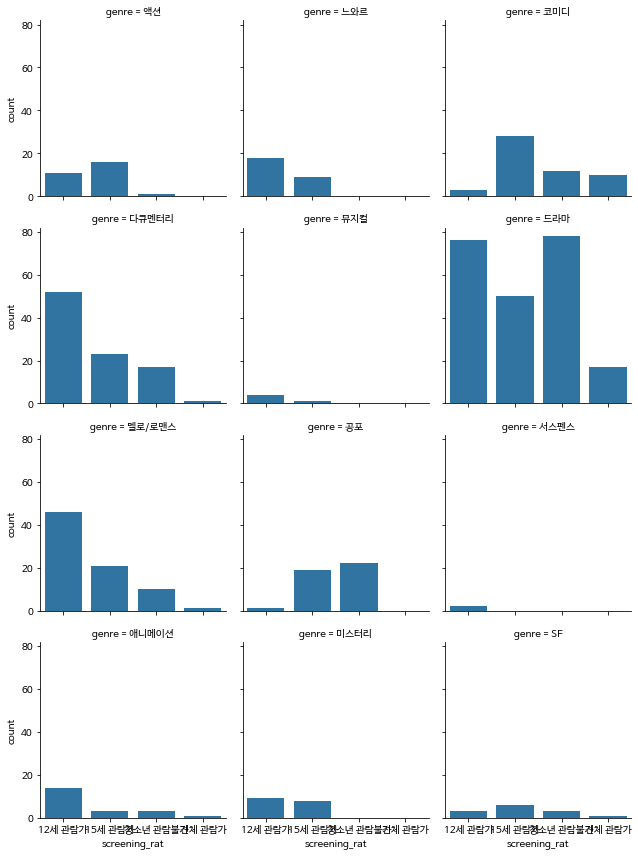

In [131]:
facet =sns.FacetGrid(train,col='genre',col_wrap = 3)
facet.map(sns.countplot,'screening_rat')

영화 장르별로 상영등급 순위를 매겨보면 청소년관람불가 등급을 받은 영화수는 드라마,공포,다큐멘터리,멜로/로맨스 순으로 많다.

##4) 감독의 전작품 수와 현재 작품의 관객수 관계

Text(0, 0.5, '관객수')

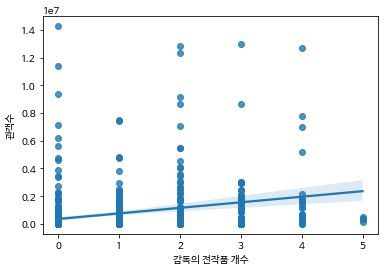

In [135]:
plt.subplots()
sns.regplot(x='dir_prev_num', y='box_off_num',data=train)
plt.xlabel('감독의 전작품 개수')
plt.ylabel('관객수')

감독이 전에 제작에 참여한 영화의 개수와 영화관람객 명수 사이에는 약간의 양의 상관관계가 있음을 확인할 수 있다. 

In [ ]:
##5)장르별 평균 스텝수

In [154]:
train[['genre','num_staff']].groupby('genre').mean().sort_values('num_staff',ascending=False)

,num_staff
genre,
액션,337.5
느와르,311.1
코미디,209.1
SF,197.3
공포,176.4
드라마,164.5
멜로/로맨스,135.8
미스터리,117.4
서스펜스,111.0


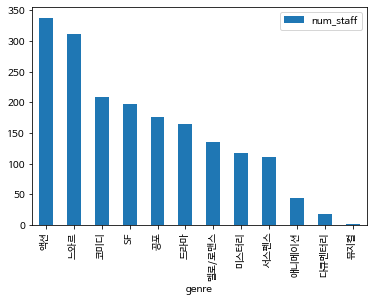

In [155]:
train[['genre','num_staff']].groupby('genre').mean().sort_values('num_staff',ascending=False).plot(kind='bar')

장르별로 평균 스텝수를 따져봤을 때 평균 스텝수는 액션,느와르,코미디,SF 순으로 많다. 특히 평균 스텝수가 액션, 느와르가 다른 장르들에 비해 비교적 많은 스텝들이 필요함을 알 수 있다.